In [1]:
from tomo_encoders.misc import viewer
from tifffile import imread
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
vol = imread('/data02/MyArchive/aisteer_3Dencoders/tmp_data/tmpVbin.tiff')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

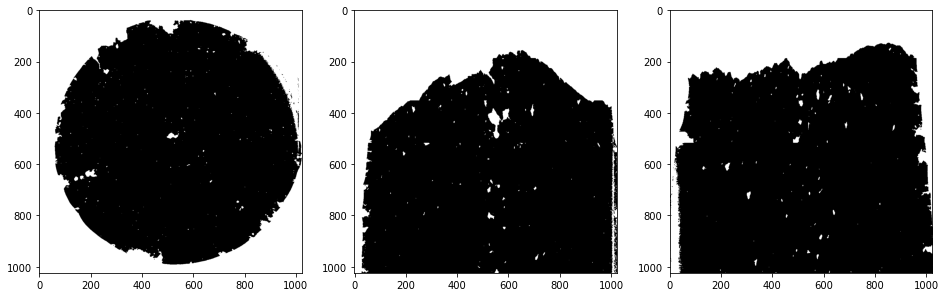

In [3]:
fig, ax = plt.subplots(1,3, figsize = (16,8))
viewer.view_midplanes(vol, ax = ax)

In [4]:
imgs = viewer.get_orthoplanes(vol = vol)

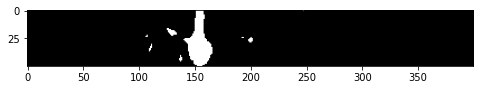

In [5]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.imshow(imgs[1][450:500,400:800], cmap = 'gray')

In [6]:
vol.shape

(1024, 1024, 1024)

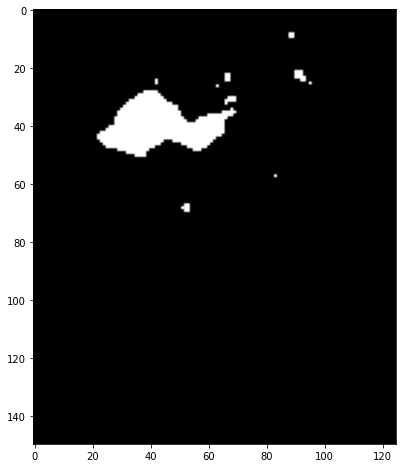

In [24]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.imshow(imgs[0][450:600,475:600], cmap = 'gray')

In [48]:
from cupyx.scipy.ndimage import label
import cupy as cp

ImportError: cannot import name 'find_objects' from 'cupyx.scipy.ndimage' (/home/atekawade/anaconda3/envs/tf2GPU/lib/python3.9/site-packages/cupyx/scipy/ndimage/__init__.py)

In [11]:
lab, n = label(cp.array(vol))
lab = lab.get()

In [25]:
s = (512,490,415)
v = lab == lab[s]

In [33]:
from tomo_encoders.structures.voids import Voids

In [34]:
voids_b = Voids().guess_voids(cp.array(vol), 4)

	STAT: voids found - 43283


In [36]:
voids_b.sort_by_size()

In [38]:
v = voids_b["x_voids"][-1]

In [51]:
voids_b["s_voids"][-1]

(slice(354, 517, None), slice(463, 563, None), slice(496, 609, None))

In [55]:
517*4

2068

In [58]:
id_start = np.asarray([130,219,221,225,223,225])
id_end = np.asarray([878,879,879,878,877,1027])
hts = id_end - id_start

In [59]:
hts

array([748, 660, 658, 653, 654, 802])

In [61]:
748+660+658

2066

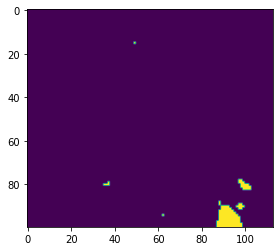

In [84]:
plt.imshow(vol[520, slice(463, 563, None), slice(496, 609, None)])

In [64]:
voids_b["s_voids"][-1]

(slice(354, 517, None), slice(463, 563, None), slice(496, 609, None))

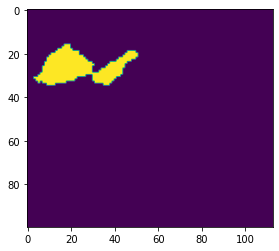

In [54]:
plt.imshow(v[-1])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

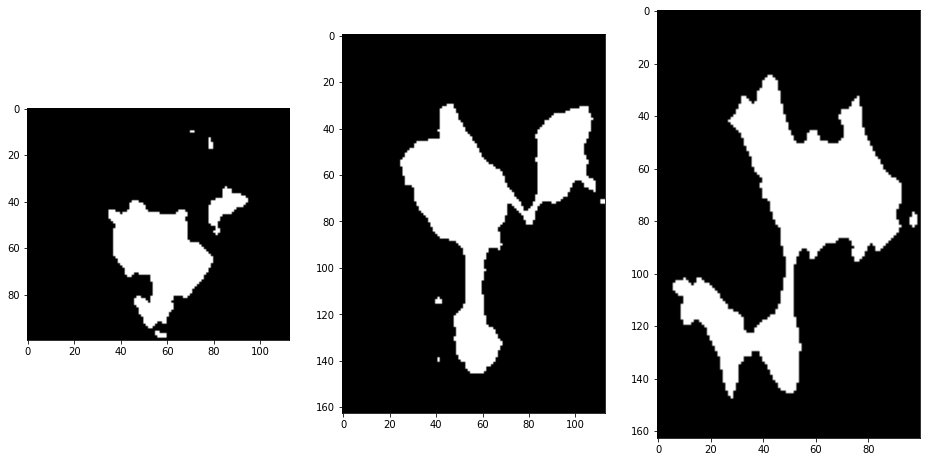

In [40]:
fig, ax = plt.subplots(1,3,figsize = (16,8))
viewer.view_midplanes(v, ax = ax)

In [41]:
v.shape

(163, 100, 113)

In [42]:
from tifffile import imwrite

In [43]:
imwrite('/home/atekawade/Dropbox/Arg/transfers/runtime_plots/big_void.tiff', v)

In [44]:
import vedo

In [45]:
surf = vedo.Volume(v).isosurface(0.5)

In [46]:
from tomo_encoders.mesh_processing.vox2mesh import save_ply

In [47]:
save_ply('/home/atekawade/Dropbox/Arg/transfers/runtime_plots/big_void.ply', surf.points(), surf.faces())